<a target="_blank" href="https://colab.research.google.com/github/estocasticos-udem/clases-2023-2/blob/main/clase3_10-08-2023.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [53]:
import random
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# Clase 4

* **Tema**: Variables aleatorias
* **Fecha**: 07/09/2023

## Variables aleatorias

En construcción...



**Ejemplo 2**: Suponga un experimento que consiste en lanzar una moneda no cargada tres veces
1. Obtenga el espacio muestral
2. Sea la VA $X$ = *Numero de caras obtenidas en el lanzamiento*, detalle una tabla donde se muestre el valor de $X$ asociado a cada una de las salidas en el espacio muestral
3. Muestre de manera resumida, las salidas asociadas a cada cantidad de caras.
4. Obtenga la tabla asociada a la funcion de probabilidad.
5. Obtenga la grafica asociada a la función de probabilidad.
6. ¿Cual es el valo esperado?


In [54]:
# 1. Espacio muestral

moneda_1 = ['H', 'T']
moneda_2 = ['H', 'T']
moneda_3 = ['H', 'T']

# Espacio muestral
S = list(itertools.product(moneda_1, moneda_2,moneda_3))
caras = [s_i.count('H') for s_i in S]
print(f"S = {S}")
print(f"caras = {caras}")

S = [('H', 'H', 'H'), ('H', 'H', 'T'), ('H', 'T', 'H'), ('H', 'T', 'T'), ('T', 'H', 'H'), ('T', 'H', 'T'), ('T', 'T', 'H'), ('T', 'T', 'T')]
caras = [3, 2, 2, 1, 2, 1, 1, 0]


In [55]:
# 2. Dataframe: Relación entre la salida y el numero de caras
df = pd.DataFrame({'S': S, 'caras': caras})
df

,S,caras
0,"(H, H, H)",3
1,"(H, H, T)",2
2,"(H, T, H)",2
3,"(H, T, T)",1
4,"(T, H, H)",2
5,"(T, H, T)",1
6,"(T, T, H)",1
7,"(T, T, T)",0


In [56]:
# 3. Salidas agrupadas
df_caras = pd.DataFrame(df.groupby("caras").value_counts())
df_caras

0
caras S           
0     (T, T, T)  1
1     (H, T, T)  1
      (T, H, T)  1
      (T, T, H)  1
2     (H, H, T)  1
      (H, T, H)  1
      (T, H, H)  1
3     (H, H, H)  1

In [57]:
# 4. Calculo de las probabilidades
N = df.shape[0]
P = 1/N
df['prob'] = P
df

,S,caras,prob
0,"(H, H, H)",3,0.125
1,"(H, H, T)",2,0.125
2,"(H, T, H)",2,0.125
3,"(H, T, T)",1,0.125
4,"(T, H, H)",2,0.125
5,"(T, H, T)",1,0.125
6,"(T, T, H)",1,0.125
7,"(T, T, T)",0,0.125


In [58]:
# 4. Obtención de la funcion de probabilidad
x = [0, 1, 2, 3]
prob_model = {}
for x_i in x:
    prob_x_i = df["prob"].where(df["caras"] == x_i).dropna().sum()
    print(f"x = {x_i} --> P(X = {x_i}) = {prob_x_i}")
    prob_model[x_i] = prob_x_i
print(prob_model)
df_model = pd.DataFrame({"x": prob_model.keys(), "P(x)": prob_model.values()}) 
df_model = df_model.set_index('x')
df_model

x = 0 --> P(X = 0) = 0.125
x = 1 --> P(X = 1) = 0.375
x = 2 --> P(X = 2) = 0.375
x = 3 --> P(X = 3) = 0.125
{0: 0.125, 1: 0.375, 2: 0.375, 3: 0.125}


,P(x)
x,
0,0.125
1,0.375
2,0.375
3,0.125


In [59]:
# 4. Tabla de la funcion de probabilidad
df_model = pd.DataFrame({"x": prob_model.keys(), "P(x)": prob_model.values()}) 
df_model = df_model.set_index('x')
df_model

,P(x)
x,
0,0.125
1,0.375
2,0.375
3,0.125


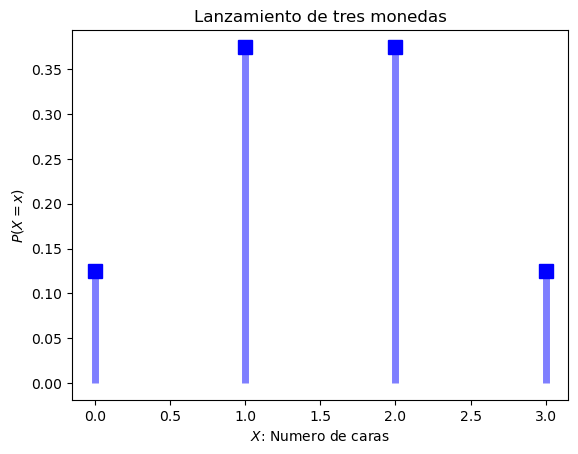

In [60]:
# 5. Grafica
plt.plot(x, df_model["P(x)"], 'bs', ms=10)
plt.vlines(x, 0, df_model["P(x)"], colors='b', lw = 5, alpha=0.5)
plt.xlabel("$X$: Numero de caras")
plt.ylabel("$P(X = x)$")
plt.title("Lanzamiento de tres monedas")
plt.show()

**Ejemplo 2**: 
Un psicólogo infantil se interesa por el número de veces que el llanto de un recién nacido despierta a su madre después de la medianoche. Para una muestra aleatoria de 50 madres, se obtuvo la siguiente información. 

|$x$|$P_X(x)$|
|---|---|
|0|$P_X(x = 0) = \frac{2}{50}$|
|1|$P_X(x = 1) = \frac{11}{50}$|
|2|$P_X(x = 2) = \frac{23}{50}$|
|3|$P_X(x = 3) = \frac{9}{50}$|
|4|$P_X(x = 4) = \frac{4}{50}$|
|5|$P_X(x = 5) = \frac{1}{50}$|

Donde:
* **VA**: $X$ numero de el número de veces por semana que el llanto de un recién nacido despierta a su madre después de la medianoche.
* **Valores que toma la VA**: $x = {0,1,2,3,4,5}$

Se pide:
1. Obtenga una tabla asociada a la función de probabilidad.
2. Obtenga la grafica de la función de probabilidad.


In [61]:
# 1. Tabla
x = range(0,6)
p_x = [2/50, 11/50, 23/50, 9/50, 4/50, 1/50]
df_model = pd.DataFrame({"x": x, "P(x)": p_x}, index= x) 
df_model = df_model.set_index('x')
df_model

,P(x)
x,
0,0.04
1,0.22
2,0.46
3,0.18
4,0.08
5,0.02


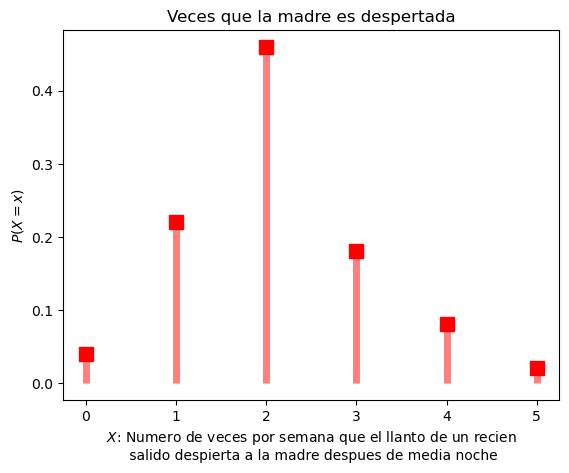

In [62]:
# 2. Grafica
plt.plot(x, df_model["P(x)"], 'rs', ms=10)
plt.vlines(x, 0, df_model["P(x)"], colors='r', lw = 5, alpha=0.5)
plt.xlabel("$X$: Numero de veces por semana que el llanto de un recien\n salido despierta a la madre despues de media noche")
plt.ylabel("$P(X = x)$")
plt.title("Veces que la madre es despertada")
plt.show()

In [63]:
# 6. Valor esperado
mu_x = sum(df_model['P(x)'] * df_model.index)
print(mu_x)

2.1


**Ejemplo 3**: 
Supongamos que Nancy tiene clases tres días a la semana. Asiste a clases tres días a la semana el 80 % del tiempo, dos días el 15 % del tiempo, un día el 4 % del tiempo y ningún día el 1 % del tiempo. Supongamos que se selecciona una semana al azar.

Donde:
* **VA**: $X$ el número de días a la semana que Nancy asiste a clase.
* **Valores que toma la VA**: $x = {0,1,2,3}$

Se pide:
1. Obtenga una tabla asociada a la función de probabilidad.
2. Obtenga la grafica de la función de probabilidad.

In [64]:
# 1. Tabla
x = [0, 1, 2, 3]
p_x = [0.01, 0.04, 0.15, 0.8]
df_model = pd.DataFrame({"x": x, "P(x)": p_x}, index= x) 
df_model = df_model.set_index('x')
df_model

,P(x)
x,
0,0.01
1,0.04
2,0.15
3,0.80


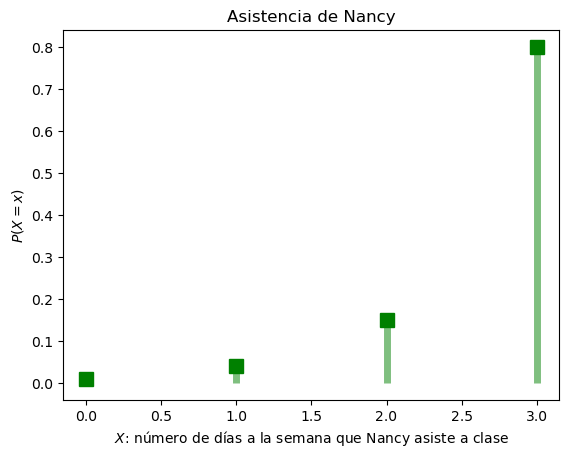

In [65]:
# 2. Grafica
plt.plot(x, df_model["P(x)"], 'gs', ms=10)
plt.vlines(x, 0, df_model["P(x)"], colors='g', lw = 5, alpha=0.5)
plt.xlabel("$X$: número de días a la semana que Nancy asiste a clase")
plt.ylabel("$P(X = x)$")
plt.title("Asistencia de Nancy")
plt.show()

**Ejemplo 4**:
Un equipo de fútbol masculino juega al fútbol en cero, en uno o en dos días a la semana. La probabilidad de que jueguen cero días es de 0.2, la de que jueguen un día es de 0.5 y la de que jueguen dos días es de 0.3. Calcule el promedio a largo plazo o el valor esperado, $\mu$, del número de días por semana que el equipo de fútbol masculino juega al fútbol.

Donde:
* **VA**: $X$ el número de días que el equipo de fútbol masculino juega al fútbol por semana.
* **Valores que toma la VA**: $x = {0,1,2}$

Se pide:
1. Obtenga una tabla asociada a la función de probabilidad.
2. Obtenga la grafica de la función de probabilidad.
3. Obtenga la media

In [66]:
# 1. Tabla
x = [0, 1, 2]
p_x = [0.2, 0.5, 0.3]
df_model = pd.DataFrame({"x": x, "P(x)": p_x}, index= x) 
df_model = df_model.set_index('x')
df_model

,P(x)
x,
0,0.2
1,0.5
2,0.3


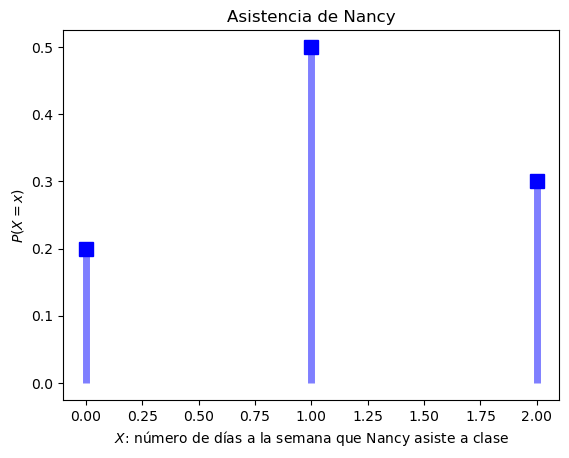

In [67]:
# 2. Grafica
plt.plot(x, df_model["P(x)"], 'bs', ms=10)
plt.vlines(x, 0, df_model["P(x)"], colors='b', lw = 5, alpha=0.5)
plt.xlabel("$X$: número de días a la semana que Nancy asiste a clase")
plt.ylabel("$P(X = x)$")
plt.title("Asistencia de Nancy")
plt.show()

In [68]:
# 3. media
def weighted_average(df, weights):
    return sum(df[weights] * df_model.index)
print(weighted_average(df_model, 'P(x)'))

1.1


**Ejemplo 5**: 
En construcción


## Referencias

1. https://pynative.com/python-random-sample/
2. https://www.educative.io/answers/what-is-randomsample-in-python
3. https://note.nkmk.me/en/python-random-choice-sample-choices/
4. https://www.boardinfinity.com/blog/random-sample-in-python/
5. https://www.codecademy.com/resources/docs/python/random-module/choice
6. https://maxhalford.github.io/blog/weighted-sampling-without-replacement/
7. https://sparkbyexamples.com/numpy/how-to-use-numpy-random-choice-in-python/
8. https://www.educative.io/answers/what-is-the-randomchoices-method-in-python
9. https://www.w3schools.com/python/ref_random_choices.asp
10. https://www.geeksforgeeks.org/random-choices-method-in-python/
11. https://interactivechaos.com/en/python/function/randomchoice
12. https://docs.python.org/es/3/library/random.html
13. https://www.geeksforgeeks.org/randomly-select-elements-from-list-without-repetition-in-python/
14. https://openstax.org/details/books/contemporary-mathematics
15. https://realpython.com/python-itertools/
16. https://www.pythoncheatsheet.org/modules/itertools-module
17. 